# Семинар 10: введение в АБ-тесты

Давайте попробуем проделать все ручные задачи на компьютере! Начнём с возраста. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# выбока Фёдора 
x_f = np.array([200, 140])

# выбока Шарика
x_s = np.array([200, 190])

# выбока Матроскина
x_m = np.array([150, 140])

In [3]:
# среднее можно найти так
x_f.mean()

170.0

In [4]:
# стандартное отклонение 
np.std(x_f, ddof=1)

42.42640687119285

In [5]:
# доверительный интервал вручную 

mean = x_f.mean()
sd = np.std(x_f, ddof=1)

n = x_f.size

left = mean - 1.96*sd/np.sqrt(n)
right = mean + 1.96*sd/np.sqrt(n)

print('Доверительный интервал: [{:.2f}; {:.2f}]'.format(left,right))

Доверительный интервал: [111.20; 228.80]


Точно такой же интервал, но внутренними средствами питона: 

In [6]:
from statsmodels.stats.weightstats import _zconfint_generic
_zconfint_generic(mean,  sd/np.sqrt(n), 0.05, 'two-sided')

(111.20108046379838, 228.79891953620162)

Проверим гипотезу о том, что $mu = 160$. Сначала построим доверительный интервал для разности. Будем использовать критическое значение $1.96$. 

In [7]:
mu = 160
_zconfint_generic(mean - mu,  sd/np.sqrt(n), 0.05, 'two-sided')

(-48.79891953620162, 68.79891953620162)

Теперь посчитаем руками наблюдаемое значение $t-$статистики. Если оно меньше $1.96$, на уровне значимости $5\%$ гипотеза не отвергается. 

In [9]:
(x_f.mean() - mu)/sd*np.sqrt(n)

0.33333333333333337

Теперь сделаем то же самое внутренними средствами питона. Первое число - $t-$ статистика. Второе число - максимальный уровень значимости, при котором гипотеза не отвергается. Если это число больше $5\%$, гипотеза не отвергается на уровне доверия $95\%$. Если меньше, отвергается. Просто пока что примите это как факт...

In [10]:
from statsmodels.stats.weightstats import ztest
ztest(x_f, value = mu)

(0.3333333333333333, 0.7388826803635273)

Теперь давайте посмотрим, как задачи, которые были заданы вам на дом, решаются в python.

## Задачка 1

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [11]:
mu = 525
sd = 100

n = 100
mean = 541.4

# руками считаем границы доверительного интервала: 
left = (mean - mu) - 2*sd/np.sqrt(n)
right = (mean - mu) + 2*sd/np.sqrt(n)

print('Доверительный интервал: [{:.2f}; {:.2f}]'.format(left,right))

Доверительный интервал: [-3.60; 36.40]


In [12]:
# Теперь то же самое через t-статистику! 

t_nabl = (mean - mu)/(sd/np.sqrt(n))
print(t_nabl)

1.6399999999999977


Как было выше, доверительные интервалы, но с уточнённым значением $1.96$ можно построить внутренними средствами python.

In [13]:
left = (mean - mu) - 1.96*sd/np.sqrt(n)
right = (mean - mu) + 1.96*sd/np.sqrt(n)

print('Доверительный интервал: [{:.2f}; {:.2f}]'.format(left,right))

Доверительный интервал: [-3.20; 36.00]


In [14]:
from statsmodels.stats.weightstats import _zconfint_generic

_zconfint_generic(mean - mu,  sd/np.sqrt(n), 0.05, 'two-sided')

(-3.1996398454005615, 35.999639845400516)

## Задачка 2

Олег подбрасывает монетку и орёт: "ОРЁЛ-РЕШКА-ОРЁЛ-РЕШКА!". Ещё он недавно посмотрел фильм Кристофера Нолана "Тёмный рыцарь". Там ему очень понравился Харви Дент. Потому что у него тоже была монетка, которую тот подбрасывал. ЛСП стало интересно: а правильная ли у него монетка. Действительно ли она выпадает орлом с вероятностью $\frac{1}{2}$? 

* Олег подбросил монетку трижды и получил комбинацию: $OPP$. Найдите долю выпадения орла.  Дальше будем обозначать эту долю как $\hat p$. 
* На теории вероятностей вы докажете, что стандартное отклонение для доли считается по формуле $ \sqrt{\frac{\hat p \cdot (1 - \hat p)}{n}}.$ Найдите среднее отклонение доли. 
* Можно показать, что $\hat p$ имеет нормальное распределение. Постройте на основе правила двух сигм для вашей оценки доли доверительный интервал. Найдите его ширину. 
*  Олег подбросил монетку ещё два раза и получил $OPPOP$. Найдите доверительный интервал для этой ситуации. Найдите его ширину. Стал ли он уже? Почему это произошло? 
* Проверьте гипотезу о том, что $p = \frac{1}{2}$ против гипотезы $p \ne \frac{1}{2}$

Строим доверительный интервал для $p$ по формуле:

$$\hat{p}\pm 1.96 \cdot \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [15]:
n = 3
m = 1
p_hat = m/n

std = np.sqrt(p_hat*(1-p_hat)/n)


# руками считаем границы доверительного интервала: 
left =  p_hat - 1.96*std
right = p_hat + 1.96*std

print('Доверительный интервал: [{:.2f}; {:.2f}]'.format(left,right))

Доверительный интервал: [-0.20; 0.87]


In [16]:
from statsmodels.stats.proportion import proportion_confint

# первым аргументом надо указать число удачных подбрасываний, вторым общее число бросков
normal_interval = proportion_confint(m, n, alpha = 0.05)
normal_interval

(0.0, 0.866767964039479)

In [17]:
print('Ширина интервала:', normal_interval[1] - normal_interval[0])

Ширина интервала: 0.866767964039479


Увеличим число наблюдений! 

In [18]:
n = 5
m = 2

normal_interval = proportion_confint(m, n, alpha = 0.05)

print('Ширина интервала:', normal_interval[1] - normal_interval[0])
normal_interval

Ширина интервала: 0.8294065944921178


(0.0, 0.8294065944921178)

Видим, что доверительный интервал стал уже. 

## Задачка 3

Давайте уточним правило трёх сигм. Утвержедение: $95\%$ вероятностной массы случайной величины $X \sim N(\mu,\sigma^2)$ лежит в интервале $\mu +- c \cdot \sigma$. Чему равно значение константы $c$? 

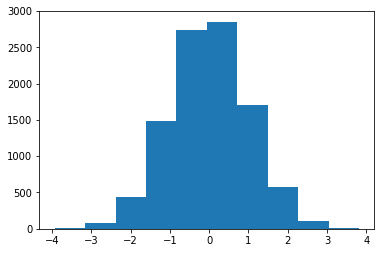

In [21]:
# пакет для картинок
from matplotlib import pyplot as plt

# пакет для статистики
import scipy.stats as sts

# сгенерируем выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(10000)

plt.hist(sample)
plt.show()

In [22]:
# находим нужный нам квантиль нормального распределения
round(norm_rv.ppf((1-0.95)/2),4)

-1.96

По аналогии можно найти точное значение, на которое нужно умножать ошибку для любой константы $c$.

__ВАЖНО:__ всё, о чём написано выше, работает только тогда, когда $\bar x$ и $\hat p$ имеют нормальное распределение. Иногда это не так и нужно использовать другие распределения. Но об этом вы будете говорить подробнее на теории вероятности и математической статистике. А мы в следущей тетрадке покажем вам более универсальный метод по работе с гипотезами, работающий почти всегда. Под названием бустрап.